# Example 3.2: Auto spectral density of the response of a single degree of freedom system
In this example we will calculate the auto-spectral density of the response of a single degree of freedom system subjected to white noise loading. We start by defining the equation of motion.

$$M\ddot{y} + C \dot{y} + Ky = X(t) $$

Here $M$, $C$ and $K$ are mass damping and stiffnes coefficients and $X(t)$ is the stochastic dynamic loading. The auto-spectral density of the load is defined as

$$S_X(\omega) = 1 $$

## Step 1: Auto spectral density of the load
We start by plotting the auto-spectral density of the load.

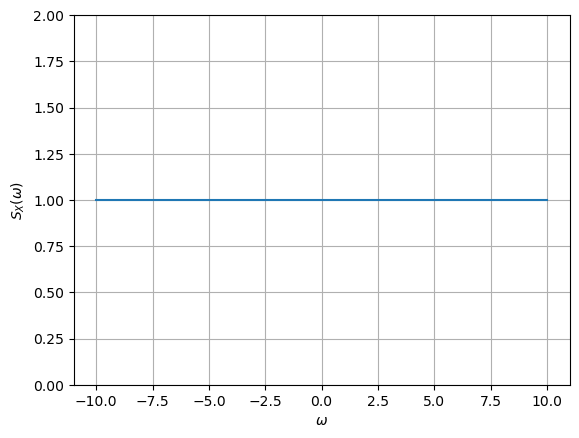

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as sps
w = np.linspace(-10,10,1001) # Frequency axis
Sx = np.ones(w.shape[0]) # Auto-spectral density of the load

plt.figure()
plt.plot(w,Sx)
plt.ylim(0, 2)
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$S_{X}(\omega)$');

The figure shows that the auto-spectral density is flat. This means that all frequencies are equally represented, which is also the case for white light. This is the reason for calling stochastic processes with flat spectra a white noise process. 

## Step 2: Frequency response function
To calculate the response, we need the frequency response function of the system.

$$H(\omega) = \frac{1}{-\omega^2M+i\omega C + K} $$

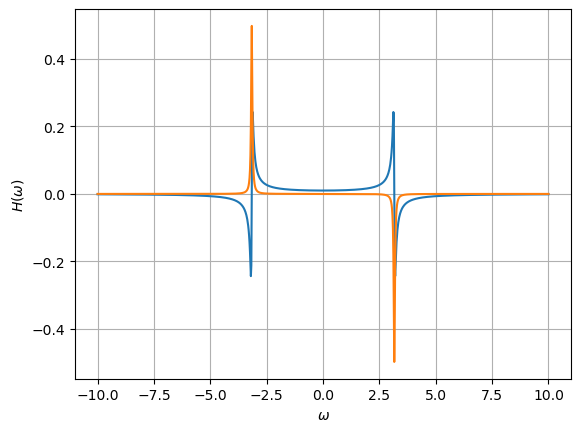

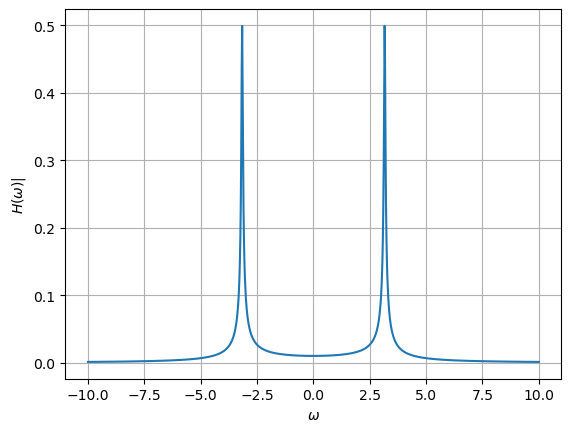

In [7]:
M = 10
K = 100
zeta = 1.0/100.0
C = 2*zeta*M*(K/M)**0.5 # Damping coefficient

H = 1/(-w**2*M+1j*w*C+K) # Frequency response function

plt.figure()
plt.plot(w,np.real(H))
plt.plot(w,np.imag(H))
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$H(\omega)$');

plt.figure()
plt.plot(w,np.abs(H))
plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$H(\omega)|$');


## Step 3 : Auto spectral density of the response
The auto spectral density of the load is defined as

$$S_{y}(\omega) = \bar{H}(\omega)S_X(\omega)H(\omega) $$ 

Here the overbar denotes complex conjugate. The auto spectral density of the response can den be calculated using Python as follows

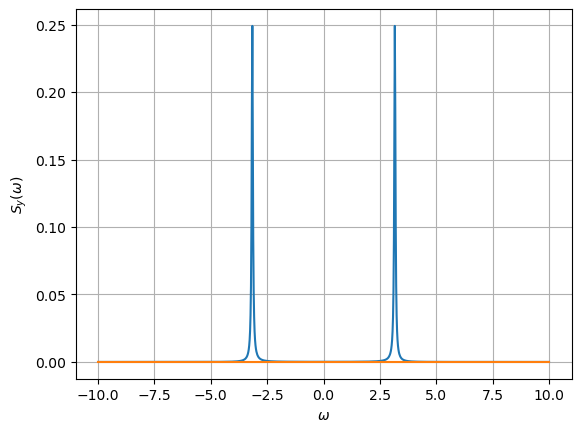

In [4]:
Sy = np.conj(H)*Sx*H # Auto-spectral density of the response

plt.figure()
plt.plot(w,np.real(Sy))
plt.plot(w,np.imag(Sy))

plt.grid()
plt.xlabel(r'$\omega$');
plt.ylabel(r'$S_y(\omega)$');

The auto-spectral density is symmetric about the vertical axis. The two peaks correspond to the natural frequency of the system. The area under the auto-spectral density is the variance of the response. The auto-spectral density clearly illustrates that it is frequency content close to the natural frequency that contributes most to the variance of the response. 

## Step 4: Probability density function of the response 
We calculate the variance (standard deviation) of the response by integrating the auto-spectral density and use that together with the mean value of the response, which is zero in this example, to plot the probability density function of the response.

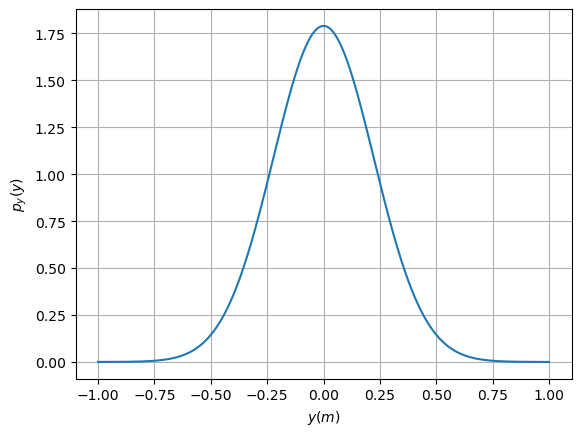

In [5]:
std_x = np.real(np.trapz(Sy,w))**0.5 # Standard deviation of the response

y = np.linspace(-1,1,1000)
y_pdf = sps.norm.pdf(y,0,std_x) #Probability density function of the load.

plt.figure()
plt.plot(y,y_pdf)
plt.grid()
plt.xlabel(r'$y (m)$');
plt.ylabel(r'$p_y(y)$');